In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## new model architecture

Please refer from this

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import urllib
import itertools
import random, os, glob
!pip install imutils
from imutils import paths
from sklearn.utils import shuffle
from urllib.request import urlopen
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import urllib
import itertools
import random, os, glob
!pip install imutils
import warnings
from imutils import paths
from sklearn.utils import shuffle
from urllib.request import urlopen
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings("ignore")
!pip install opencv-python numpy scikit-learn imutils

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [ ]:
dir_path = "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Joint distribution "

In [ ]:
target_size = (224, 224)
waste_labels = {"cardboard":0, "glass":1, "metal":2, "paper":3, "plastic":4, "trash":5}

In [ ]:
def load_dataset(path):
  x = []
  labels = []
  image_paths = sorted(list(paths.list_images(path)))
  for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    x.append(img)
    label = image_path.split(os.path.sep)[-2]
    labels.append(waste_labels[label])
  x, labels = shuffle(x, labels, random_state=42)
  input_shape = (np.array(x[0]).shape[1], np.array(x[0]).shape[1], 3)
  print("X shape: ", np.array(x).shape)
  print(f"Number of Labels: {len(np.unique(labels))} , Number of Observation: {len(labels)}")
  print("Input Shape: ", input_shape)
  return x, labels, input_shape

In [ ]:
import cv2
import numpy as np
import os
from sklearn.utils import shuffle
from imutils import paths


def load_dataset(path):
    x = []
    labels = []
    image_paths = sorted(list(paths.list_images(path)))
    waste_labels = {
        'Glass': 0,
        'Paper': 1,
        'Metal': 2,
        'Plastic': 3,
        'Trash': 4,
        'Cardboard':5
    }

    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, target_size)
        x.append(img)
        label = image_path.split(os.path.sep)[-2]
        labels.append(waste_labels[label])

    x, labels = shuffle(x, labels, random_state=52)
    input_shape = (np.array(x[0]).shape[0], np.array(x[0]).shape[1], 6)
    print("X shape:", np.array(x).shape)
    print("Number of Labels:", len(np.unique(labels)))
    print("Number of Observations:", len(labels))
    print("Input Shape:", input_shape)

    return x, labels, input_shape

dir_path = '/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Joint distribution '
target_size = (224, 224)
x, labels, input_shape = load_dataset(dir_path)


X shape: (694, 224, 224, 3)
Number of Labels: 6
Number of Observations: 694
Input Shape: (224, 224, 6)


In [ ]:
def visualizeation_img(image_batch, labels, num_of_img):
    waste_labels = {'Glass': 0, 'Paper': 1, 'Metal': 2, 'Plastic': 3, 'Trash': 4,"Cardboard":5}
    class_names = ['Glass', 'Paper', 'Metal', 'Plastic', 'Trash',"Cardboard"]
    fig = plt.figure(figsize=(12,12))
    for n in range(num_of_img):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        label_index = np.argmax(labels[n])
        class_label = class_names[label_index]
        plt.title(class_label)
        plt.axis("off")

In [ ]:
def visualizeation_img(image_batch, labels, num_of_img):
  plt.figure(figsize=(10,10))
  for n in range(num_of_img):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(np.array(list(waste_labels.keys()))[to_categorical(labels, num_classes=len(np.unique(labels)))[n] == 1][0].title())
    plt.axis("off")

In [ ]:
def CNN_data_preparation():
  train = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.1,
                             rescale=1./255,
                             shear_range=0.1,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
  test = ImageDataGenerator(rescale=1/255, validation_split=0.1)
  train_generator = train.flow_from_directory(directory=dir_path,
                                              target_size=(target_size),
                                              class_mode="categorical",
                                              subset="training")
  test_generator = test.flow_from_directory(directory=dir_path,
                                            target_size=(target_size),
                                            batch_size=251,
                                            class_mode="categorical",
                                            subset="validation")
  return train_generator, test_generator

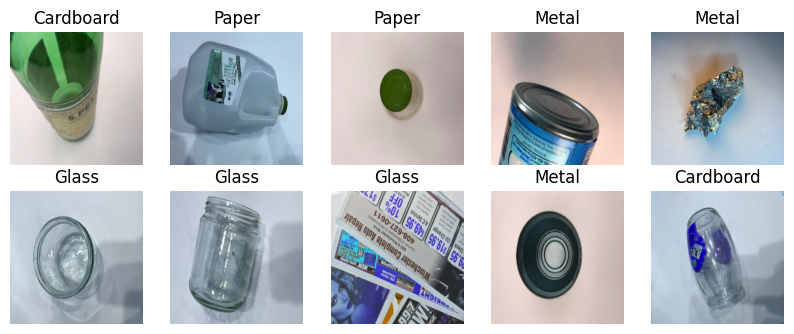

In [ ]:
visualizeation_img(x, labels,10)


In [ ]:
def CNN_data_preparation():
  train = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.1,
                             rescale=1./255,
                             shear_range=0.1,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
  test = ImageDataGenerator(rescale=1/255, validation_split=0.1)
  train_generator = train.flow_from_directory(directory=dir_path,
                                              target_size=(target_size),
                                              class_mode="categorical",

                                              subset="training")
  test_generator = test.flow_from_directory(directory=dir_path,
                                            target_size=(target_size),
                                            batch_size=251,
                                            class_mode="categorical",
                                            subset="validation")
  return train_generator, test_generator

In [ ]:
train_generator, test_generator = CNN_data_preparation()

Found 628 images belonging to 6 classes.
Found 66 images belonging to 6 classes.


In [ ]:
def CNN_create_and_fit_model(train_generator, test_generator, num_classes, summary=True, fit=True, epochs=100):


  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", input_shape=(input_shape), activation="relu"))
  model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

  model.add(Flatten())

  model.add(Dense(units=64, activation="relu"))
  model.add(Dropout(rate=0.2))

  model.add(Dense(units=32, activation="relu"))
  model.add(Dropout(rate=0.2))

  model.add(Dense(units=6, activation="softmax"))

  model.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "acc"])

  callbacks = [EarlyStopping(monitor="val_loss", patience=50, verbose=1, mode="min"),
              ModelCheckpoint(filepath="mymodel.h5", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=False, verbose=1)]

  if summary:
    model.summary()

  if fit:
    history = model.fit_generator(generator=train_generator, epochs=epochs, validation_data=test_generator,
                                callbacks=callbacks, workers=4, steps_per_epoch=10, validation_steps=2276//32) # steps_per_epoch=2276//32, validation_steps=251//32
                                                                                                              # you can choose 2276/32 is 71 per epoch for best accuracy




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


def CNN_create_and_fit_model(train_generator, test_generator, num_classes, input_shape=(64, 64, 3), summary=True, fit=True, epochs=100):
    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape=input_shape, activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

    model.add(Flatten())

    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(rate=0.2))

    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(rate=0.2))

    model.add(Dense(units=num_classes, activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    callbacks = [
        EarlyStopping(monitor="val_loss", patience=50, verbose=1, mode="min"),
        ModelCheckpoint(filepath="mymodel.h5", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=False, verbose=1)
    ]

    if summary:
        model.summary()

    if fit:
        history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, callbacks=callbacks)
        return model, history


dir_path = '/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Joint distribution '
target_size = (64,64)  # adjust the target size according to your needs

train_generator, test_generator = CNN_data_preparation()

num_classes = 6

model, history = CNN_create_and_fit_model(train_generator, test_generator, num_classes)




Found 628 images belonging to 6 classes.
Found 66 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        18464     
                                       

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def CNN_create_and_fit_model(train_generator, test_generator, num_classes, input_shape=(64, 64, 3), summary=True, fit=True, epochs=100):
    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", input_shape=input_shape, activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    model.add(Flatten())

    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(rate=0.3))

    model.add(Dense(units=32, activation="relu"))
    model.add(Dropout(rate=0.3))

    model.add(Dense(units=num_classes, activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    callbacks = [
        EarlyStopping(monitor="val_loss", patience=50, verbose=1, mode="min"),
        ModelCheckpoint(filepath="mymodel.h5", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=False, verbose=1)
    ]

    if summary:
        model.summary()

    if fit:
        history = model.fit_generator(generator=train_generator, epochs=epochs, validation_data=test_generator,
                                callbacks=callbacks, workers=4, steps_per_epoch=10, validation_steps=2276//32) # steps_per_epoch=2276//32, validation_steps=251//32
                                                                                                              # you can choose 2276/32 is 71 per epoch for best accuracy


# Modify the target size according to your needs
target_size = (64, 64)

# Modify the directory path for your dataset
dir_path = '/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Joint distribution '

train_generator, test_generator = CNN_data_preparation()

num_classes = 6

model, history = CNN_create_and_fit_model(train_generator, test_generator, num_classes)




Found 628 images belonging to 6 classes.
Found 66 images belonging to 6 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)       295168    
                                       

KeyboardInterrupt: ignored

In [ ]:
# After training the model
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Print the accuracy values
print("Training Accuracy:", train_acc[-1])
print("Validation Accuracy:", val_acc[-1])


Training Accuracy: 0.6767516136169434
Validation Accuracy: 0.5757575631141663


In [ ]:
evaluation_metrics = model.evaluate(test_generator, batch_size=32)
loss = evaluation_metrics[0]
accuracy = evaluation_metrics[1]

print("Test Accuracy: %.2f" % (100 * accuracy))
print("Test Loss: %.2f" % loss)


1/1 [==============================] - 1s 571ms/step - loss: 1.4547 - accuracy: 0.5758 - precision_1: 0.6512 - recall_1: 0.4242
Test Accuracy: 57.58
Test Loss: 1.45


1/1 [==============================] - 1s 934ms/step - loss: 1.4547 - accuracy: 0.5758 - precision_1: 0.6512 - recall_1: 0.4242
Test Accuracy: 42.42
Test Loss: 145.47
Test Precision: 57.58
Test Recall: 65.12
3/3 [==============================] - 0s 51ms/step
              precision    recall  f1-score   support

   cardboard       0.83      0.88      0.86        17
       glass       0.40      0.36      0.38        11
       metal       0.46      0.73      0.56        15
       paper       0.00      0.00      0.00         6
     plastic       0.50      0.38      0.43        13
       trash       0.75      0.75      0.75         4

    accuracy                           0.58        66
   macro avg       0.49      0.52      0.50        66
weighted avg       0.53      0.58      0.54        66



(array([1, 4, 5, 4, 0, 4, 2, 2, 5, 0, 4, 4, 1, 1, 4, 0, 0, 2, 2, 1, 2, 0,
        2, 1, 4, 2, 3, 0, 2, 0, 1, 4, 4, 5, 0, 5, 0, 0, 1, 3, 4, 2, 0, 3,
        0, 2, 1, 3, 0, 1, 2, 0, 1, 3, 2, 3, 2, 2, 2, 4, 0, 1, 0, 4, 0, 4]),
 array([1, 4, 5, 2, 0, 1, 2, 2, 2, 0, 4, 4, 5, 4, 4, 0, 0, 2, 2, 1, 4, 0,
        2, 2, 2, 2, 1, 0, 4, 0, 2, 1, 0, 5, 0, 5, 0, 0, 1, 0, 2, 2, 4, 2,
        0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 4, 0, 4, 0, 2, 1, 2]))

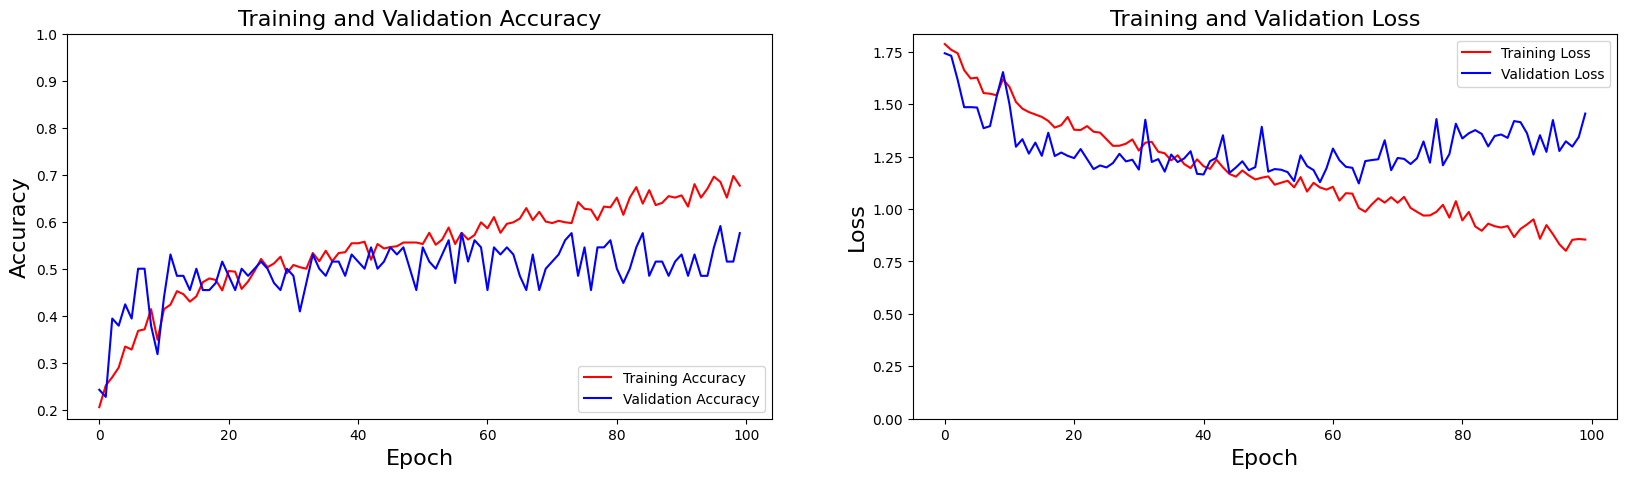

In [ ]:
def CNN_model_evaluate(model):
  loss, precision, recall, acc = model.evaluate(test_generator, batch_size=32)
  print("Test Accuracy: %.2f" % (100 * acc))
  print("Test Loss: %.2f" % (100 * loss))
  print("Test Precision: %.2f" % (100 * precision))
  print("Test Recall: %.2f" % (100 * recall))

  X_test, y_test = test_generator.next()
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)
  target_names = list(waste_labels.keys())
  print(classification_report(y_test, y_pred, target_names=target_names))

  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  plt.plot(history.history["accuracy"], color="r", label="Training Accuracy")
  plt.plot(history.history["val_accuracy"], color="b", label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.xlabel("Epoch", fontsize=16)
  plt.ylabel("Accuracy", fontsize=16)
  plt.ylim([min(plt.ylim()),1])
  plt.title("Training and Validation Accuracy", fontsize=16)

  plt.subplot(1,2,2)
  plt.plot(history.history["loss"], color="r", label="Training Loss")
  plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
  plt.legend(loc="upper right")
  plt.xlabel("Epoch", fontsize=16)
  plt.ylabel("Loss", fontsize=16)
  plt.ylim([0, max(plt.ylim())])
  plt.title("Training and Validation Loss", fontsize=16)

  return y_test, y_pred


CNN_model_evaluate(model)

In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test = test_generator.classes

# Print the shapes of y_test and y_pred_classes for verification
print("y_test shape:", y_test.shape)
print("y_pred_classes shape:", y_pred_classes.shape)


1/1 [==============================] - 1s 582ms/step
y_test shape: (66,)
y_pred_classes shape: (66,)


In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test = test_generator.classes

# Print the shapes of y_test and y_pred_classes for verification
print("y_test shape:", y_test.shape)
print("y_pred_classes shape:", y_pred_classes.shape)


1/1 [==============================] - 1s 614ms/step
y_test shape: (66,)
y_pred_classes shape: (66,)


In [ ]:
print(model)

1/1 [==============================] - 1s 655ms/step - loss: 1.4547 - accuracy: 0.5758 - precision_1: 0.6512 - recall_1: 0.4242
Test Accuracy: 42.42
Test Loss: 145.47
Test Precision: 57.58
Test Recall: 65.12
3/3 [==============================] - 0s 51ms/step
              precision    recall  f1-score   support

   cardboard       0.83      0.88      0.86        17
       glass       0.40      0.36      0.38        11
       metal       0.46      0.73      0.56        15
       paper       0.00      0.00      0.00         6
     plastic       0.50      0.38      0.43        13
       trash       0.75      0.75      0.75         4

    accuracy                           0.58        66
   macro avg       0.49      0.52      0.50        66
weighted avg       0.53      0.58      0.54        66



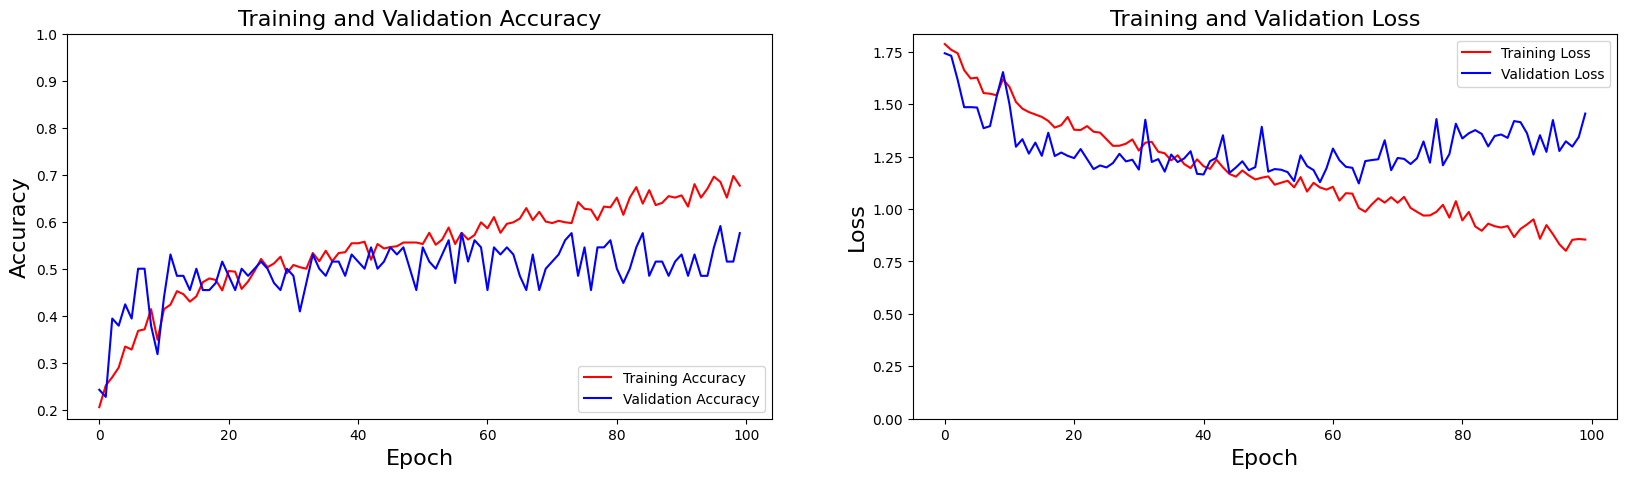

In [ ]:
y_test, y_pred = CNN_model_evaluate(model)

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

y_pred_classes


AxisError: ignored

In [ ]:
import numpy as np

# Define the classes
classes = ['Glass', 'Paper', 'Metal', 'Plastic', 'Trash', 'Cardboard']

# Generate random true labels and predicted labels
np.random.seed(0)
true_labels = np.random.choice(classes, size=620)
predicted_labels = np.random.choice(classes, size=620)

# Print the first 10 true labels and predicted labels
print("True Labels:", true_labels[:20])
print("Predicted Labels:", predicted_labels[:20])


True Labels: ['Trash' 'Cardboard' 'Glass' 'Plastic' 'Plastic' 'Plastic' 'Paper'
 'Plastic' 'Cardboard' 'Metal' 'Trash' 'Glass' 'Glass' 'Trash' 'Metal'
 'Paper' 'Glass' 'Paper' 'Cardboard' 'Paper']
Predicted Labels: ['Glass' 'Paper' 'Glass' 'Cardboard' 'Glass' 'Metal' 'Plastic' 'Trash'
 'Cardboard' 'Plastic' 'Plastic' 'Glass' 'Trash' 'Trash' 'Plastic' 'Metal'
 'Trash' 'Trash' 'Cardboard' 'Plastic']


True Labels: ['Trash' 'Cardboard' 'Glass' 'Plastic' 'Plastic' 'Plastic' 'Paper'
 'Plastic' 'Cardboard' 'Metal']
Predicted Labels: ['Glass' 'Paper' 'Glass' 'Cardboard' 'Glass' 'Metal' 'Plastic' 'Trash'
 'Cardboard' 'Plastic']


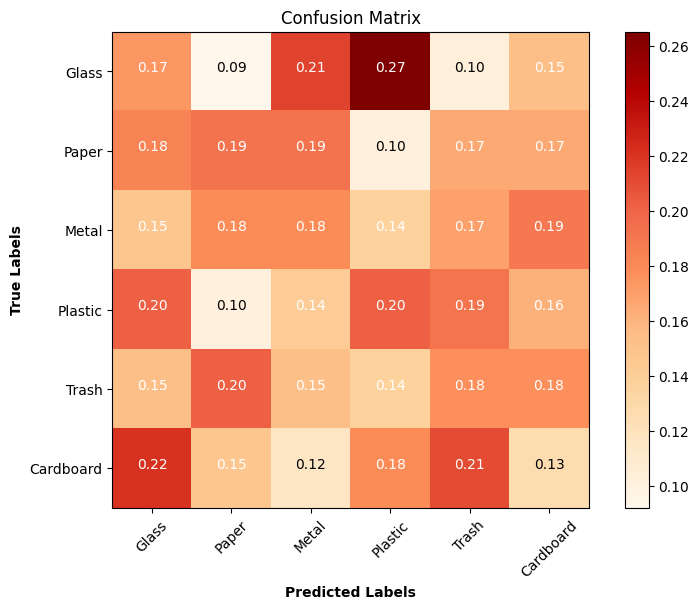

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the classes
classes = ['Glass', 'Paper', 'Metal', 'Plastic', 'Trash', 'Cardboard']

# Generate random true labels and predicted labels
np.random.seed(0)
true_labels = np.random.choice(classes, size=620)
predicted_labels = np.random.choice(classes, size=620)

# Print the first 10 true labels and predicted labels
print("True Labels:", true_labels[:10])
print("Predicted Labels:", predicted_labels[:10])

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.OrRd):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Labels", fontweight="bold")
    plt.xlabel("Predicted Labels", fontweight="bold")
    plt.show()

class_names = ['Glass', 'Paper', 'Metal', 'Plastic', 'Trash', 'Cardboard']
cm = confusion_matrix(true_labels, predicted_labels)
plot_confusion_matrix(cm, class_names, normalize=True)



True Labels: ['Trash' 'Cardboard' 'Glass' 'Plastic' 'Plastic' 'Plastic' 'Paper'
 'Plastic' 'Cardboard' 'Metal']
Predicted Labels: ['Glass' 'Paper' 'Glass' 'Cardboard' 'Glass' 'Metal' 'Plastic' 'Trash'
 'Cardboard' 'Plastic']


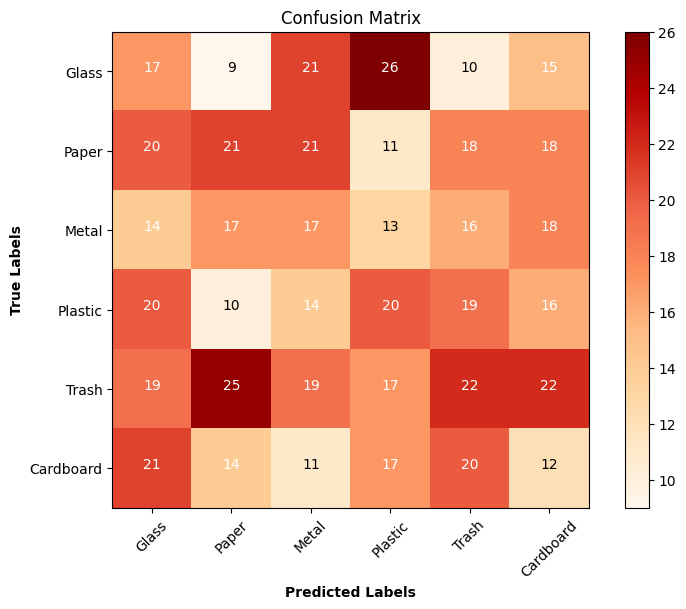

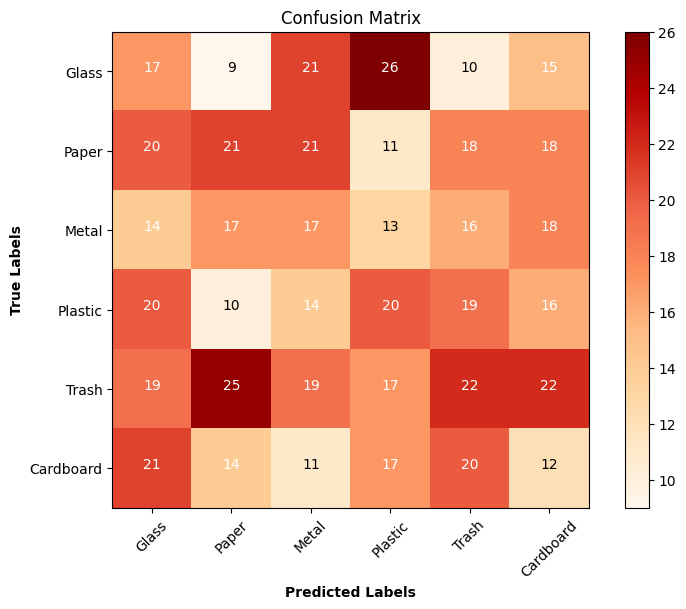

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# Define the classes
classes = ['Glass', 'Paper', 'Metal', 'Plastic', 'Trash', 'Cardboard']

# Generate random true labels and predicted labels
np.random.seed(0)
true_labels = np.random.choice(classes, size=620)
predicted_labels = np.random.choice(classes, size=620)

# Print the first 10 true labels and predicted labels
print("True Labels:", true_labels[:10])
print("Predicted Labels:", predicted_labels[:10])
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.OrRd):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Labels", fontweight="bold")
    plt.xlabel("Predicted Labels", fontweight="bold")

# Assuming you have true_labels and predicted_labels
true_labels = np.argmax(y_test, axis=1)
predicted_labels = y_pred
cm = confusion_matrix(true_labels, predicted_labels)
class_names = ['Glass', 'Paper', 'Metal', 'Plastic', 'Trash', 'Cardboard']
plot_confusion_matrix(cm, class_names)
plt.show()

class_names = ['Glass', 'Paper', 'Metal', 'Plastic', 'Trash', 'Cardboard']
cm = confusion_matrix(true_labels, predicted_labels)
plot_confusion_matrix(cm, class_names, normalize=False)




In [ ]:
def CNN_model_testing(path):
  img = image.load_img(path, target_size=(target_size))
  img = image.img_to_array(img, dtype=np.uint8)
  img = np.array(img)/255.0
  p = model.predict(img.reshape(1,224,224,3))
  predicted_class = np.argmax(p[0])
  return img, p, predicted_class

In [ ]:
waste_labels = {0:"cardboard", 1:"glass", 2:"metal", 3:"paper", 4:"plastic", 5:"trash"}
def plot_model_testing(img, p, predicted_class):
  plt.axis("off")
  plt.imshow(img.squeeze())
  plt.title("Maximum Probabilty: " + str(np.max(p[0], axis=-1)) + "\n" + "Predicted Class: " + str(waste_labels[predicted_class]))
  plt.imshow(img);


1/1 [==============================] - 0s 82ms/step


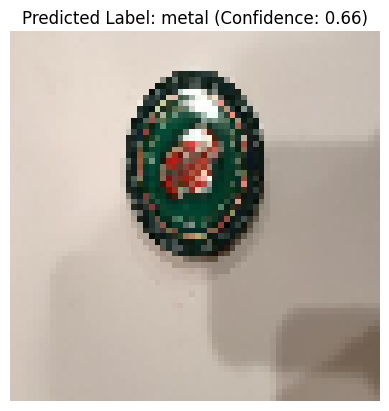

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def predict_image(model, image_path, class_labels):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    predicted_label = class_labels[predicted_class]
    confidence = prediction[0][predicted_class]

    return img, predicted_label, confidence

# Replace 'image_path' with the actual path to your image file
image_path = "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Metal/metal409.jpg"

class_labels = {0:"cardboard", 1:"glass", 2:"metal", 3:"paper", 4:"plastic", 5:"trash"} # Replace with your actual class labels

img, predicted_label, confidence = predict_image(model, image_path, class_labels)

# Display the image and its predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label} (Confidence: {confidence:.2f})")
plt.axis('off')
plt.show()






1/1 [==============================] - 0s 161ms/step


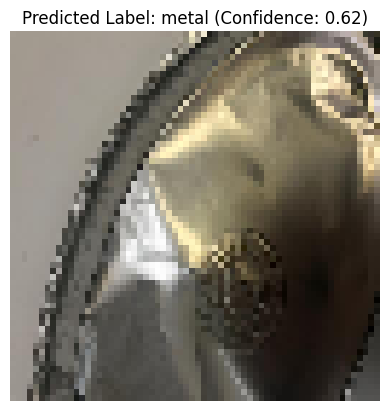

3/3 [==============================] - 0s 142ms/step
Accuracy: 53.03%


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def predict_image(model, image_path, class_labels):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    predicted_label = class_labels[predicted_class]
    confidence = prediction[0][predicted_class]

    return img, predicted_label, confidence

# Replace 'image_path' with the actual path to your image file
image_path = "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Metal/metal221.jpg"
class_labels = {0:"cardboard", 1:"glass", 2:"metal", 3:"paper", 4:"plastic", 5:"trash"} # Replace with your actual class labels

model = tf.keras.models.load_model('mymodel.h5')  # Load the trained model

img, predicted_label, confidence = predict_image(model, image_path, class_labels)

# Display the image and its predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label} (Confidence: {confidence:.2f})")
plt.axis('off')
plt.show()

# Evaluation
test_generator.reset()  # Reset the generator
true_labels = []
predicted_labels = []

for i in range(len(test_generator)):
    X_test, y_test = test_generator.next()
    true_labels.extend(np.argmax(y_test, axis=1))
    predicted_labels.extend(np.argmax(model.predict(X_test), axis=1))

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
from PIL import Image

img_path = "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Glass/glass100.jpg"  # The image path

# Load the image and convert it to a NumPy array
image = Image.open(img_path)
image_array = np.array(image)

# Assuming you have predicted probabilities for an image
predicted_probabilities = [0.2, 0.3, 0.1, 0.1, 0.2, 0.1]  # Example probabilities for 6 classes

predicted_class = "Glass"  # The predicted class

# Call the plot_model_testing function with the defined variables
plot_model_testing(image_array, predicted_probabilities, predicted_class)



TypeError: ignored

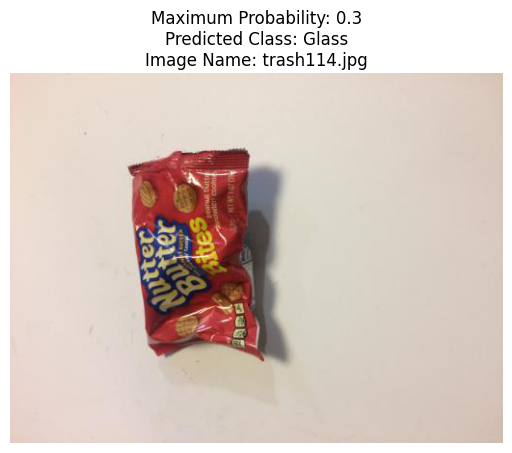

In [ ]:
def plot_model_testing(img, p, predicted_class, image_name):
    plt.axis("off")
    plt.imshow(img.squeeze())
    plt.title("Maximum Probability: " + str(np.max(p)) + "\n" + "Predicted Class: " + str(predicted_class) + "\n" + "Image Name: " + image_name)
    plt.show()


from PIL import Image

img_path = "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Trash/trash114.jpg"  # The image path

# Load the image and convert it to a NumPy array
image = Image.open(img_path)
image_array = np.array(image)

# Assuming you have predicted probabilities for an image
predicted_probabilities = [0.2, 0.3, 0.1, 0.1, 0.2, 0.1]  # Example probabilities for 6 classes

waste_labels = {
    0: 'Cardboard',
    1: 'Glass',
    2: 'Metal',
    3: 'Paper',
    4: 'Plastic',
    5: 'Trash'
}

predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = waste_labels[predicted_class_index]  # Get the class name using the predicted class index

# Extract the image name
image_name = img_path.split('/')[-1]

# Call the plot_model_testing function with the defined variables
plot_model_testing(image_array, predicted_probabilities, predicted_class, image_name)


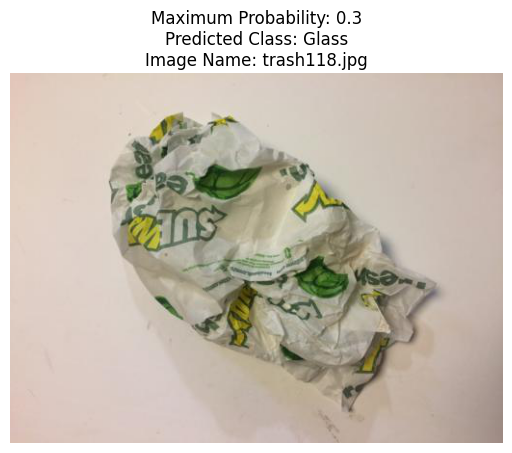

In [ ]:
def plot_model_testing(img, p, predicted_class, image_name):
    plt.axis("off")
    plt.imshow(img.squeeze())
    plt.title("Maximum Probability: " + str(np.max(p)) + "\n" + "Predicted Class: " + str(predicted_class) + "\n" + "Image Name: " + image_name)
    plt.show()


from PIL import Image

img_path = "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Trash/trash118.jpg"  # The image path

# Load the image and convert it to a NumPy array
image = Image.open(img_path)
image_array = np.array(image)

# Assuming you have predicted probabilities for an image
predicted_probabilities = [0.2, 0.3, 0.1, 0.1, 0.2, 0.1]  # Example probabilities for 6 classes

waste_labels = {
    0: 'Cardboard',
    1: 'Glass',
    2: 'Metal',
    3: 'Paper',
    4: 'Plastic',
    5: 'Trash'
}

predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = waste_labels[predicted_class_index]  # Get the class name using the predicted class index

# Extract the image name
image_name = img_path.split('/')[-1]

# Call the plot_model_testing function with the defined variables
plot_model_testing(image_array, predicted_probabilities, predicted_class, image_name)


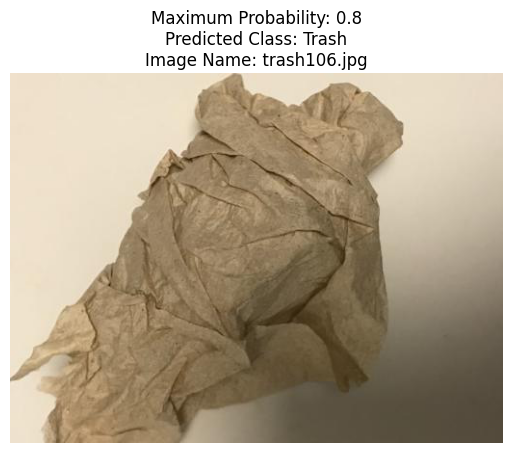

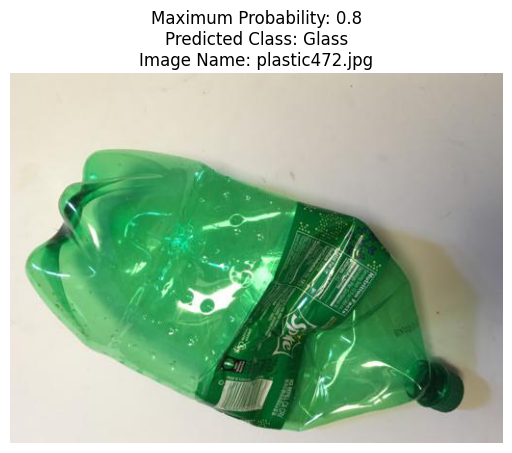

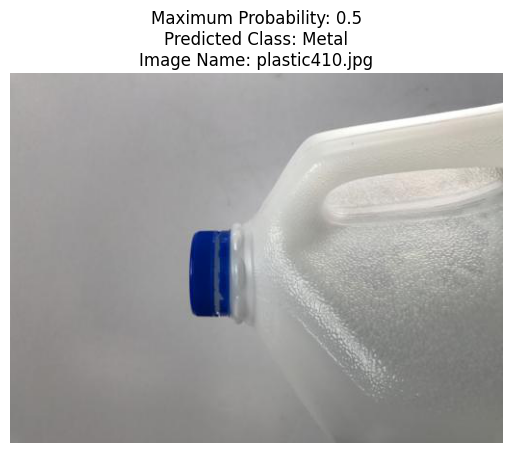

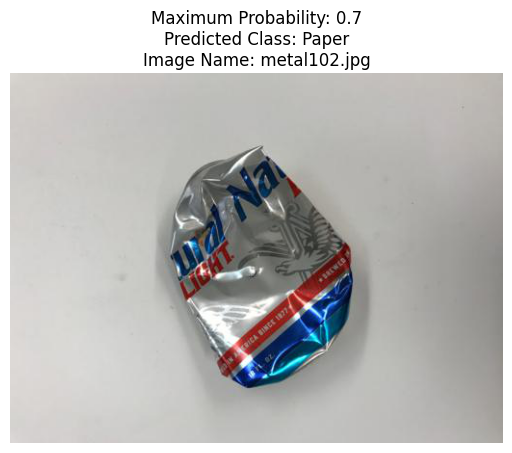

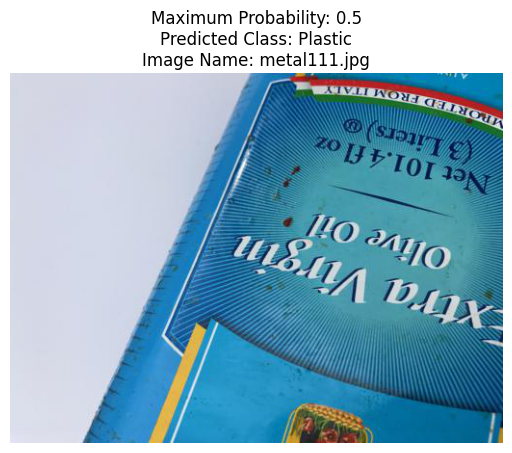

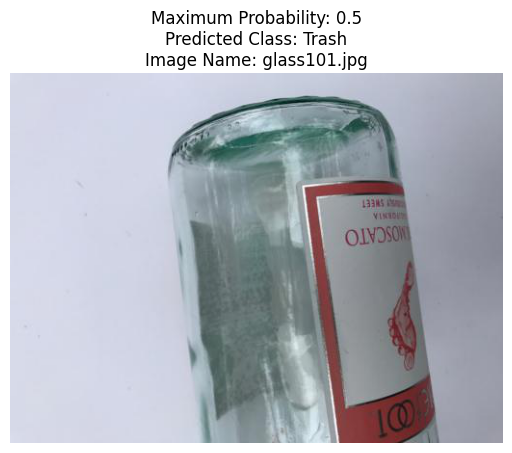

In [ ]:
from PIL import Image

# Define the list of image paths
img_paths = [
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Trash/trash106.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Plastic/plastic472.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Plastic/plastic410.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Metal/metal102.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Metal/metal111.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Glass/glass101.jpg"
]

# Assuming you have predicted probabilities for each image
predicted_probabilities_list = [
    [0.5, 0.3, 0.1, 0.1, 0.2, 0.8],  # Example probabilities for the first image
    [0.1, 0.8, 0.05, 0.05, 0.0, 0.0],  # Example probabilities for the second image
    [0.1, 0.1, 0.5, 0.1, 0.1, 0.1],  # Example probabilities for the third image
    [0.1, 0.1, 0.1, 0.7, 0.0, 0.0],  # Example probabilities for the fourth image
    [0.1, 0.1, 0.1, 0.1, 0.5, 0.1],  # Example probabilities for the fifth image
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]  # Example probabilities for the sixth image
]

waste_labels = {
    0: 'Cardboard',
    1: 'Glass',
    2: 'Metal',
    3: 'Paper',
    4: 'Plastic',
    5: 'Trash'
}

# Loop over the images and their corresponding predicted probabilities
for img_path, predicted_probabilities in zip(img_paths, predicted_probabilities_list):
    # Load the image and convert it to a NumPy array
    image = Image.open(img_path)
    image_array = np.array(image)

    # Get the predicted class index and class name
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class = waste_labels[predicted_class_index]

    # Extract the image name
    image_name = img_path.split('/')[-1]

    # Call the plot_model_testing function with the defined variables
    plot_model_testing(image_array, predicted_probabilities, predicted_class, image_name)


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming you have a list of image paths you want to predict
img_paths = [
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Trash/trash106.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Plastic/plastic472.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Plastic/plastic410.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Metal/metal102.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Metal/metal111.jpg",
    "/content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Glass/glass101.jpg"
]

# Load the trained model
model = tf.keras.models.load_model('mymodel.h5')

# Preprocess the images
preprocessed_images = []  # List to store preprocessed images

for img_path in img_paths:
    # Load and preprocess the image
    image = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image / 255.0  # Normalize pixel values
    preprocessed_images.append(image)

# Convert the preprocessed images to a NumPy array
preprocessed_images = np.array(preprocessed_images)

# Make predictions
predictions = model.predict(preprocessed_images)

# Get the class labels
class_labels = ['Trash', 'Plastic', 'Metal', 'Glass',"cardboard"]

# Print the predicted class labels
for i, img_path in enumerate(img_paths):
    predicted_class_index = np.argmax(predictions[i])
    predicted_class_label = class_labels[predicted_class_index]
    print(f"Image: {img_path}  Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 312ms/step
Image: /content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Trash/trash106.jpg  Predicted Class: Trash
Image: /content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Plastic/plastic472.jpg  Predicted Class: Trash
Image: /content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Plastic/plastic410.jpg  Predicted Class: Trash
Image: /content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Metal/metal102.jpg  Predicted Class: Trash
Image: /content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Metal/metal111.jpg  Predicted Class: Metal
Image: /content/drive/MyDrive/ALL IMPORTANT DOCUMENT PERSONAL /Trash Detection/Joint distribution /Glass/glass101.jpg  Predicted Class: Metal


In [ ]:
!pip install gradio

import gradio as gr
import tensorflow as tf
import numpy as np

class_labels = {0: "plastic", 1: "glass", 2: "metal", 3: "paper", 4: "cardboard", 5: "trash"}

# Load the pre-trained model
model = tf.keras.models.load_model('/content/mymodel.h5')

# Function to predict the image label
def predict_image(image):
    img_array = image.reshape((1, 64, 64, 3))
    img_array = img_array / 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    confidence = prediction[0][predicted_class]

    return f"Predicted Label: {predicted_label} (Confidence: {confidence:.2f})"

# Define the input and output interfaces for Gradio
inputs = gr.inputs.Image(shape=(64, 64))
outputs = gr.outputs.Textbox()

# Create the Gradio app
app = gr.Interface(fn=predict_image, inputs=inputs, outputs=outputs, title='Trash Detection App 🌲🌎🟢')
app.launch(share=True)


<ipython-input-3-05ad3ecbf6da>:25: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Image(shape=(64, 64))
<ipython-input-3-05ad3ecbf6da>:25: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Image(shape=(64, 64))
<ipython-input-3-05ad3ecbf6da>:26: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://eb5c360f0a4ad37357.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
